In [1]:
import torch 
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms ,datasets
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
from arch import Cat_Dog_CNN  # Import the model from your main script
import numpy as np
from pathlib import Path
from PIL import Image
print(torch.cuda.is_available())





%matplotlib inline
%config InlineBackend.figure_format = 'retina'


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Ahmed\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Ahmed\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

False


In [2]:
batch_size = 32
class_names = ["Cat", "Dog"]


transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       normalize]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])

train_dataset = datasets.ImageFolder('training_set_Sample',train_transforms)
test_dataset = datasets.ImageFolder('test_set_Sample',test_transforms)

train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_cnn = Cat_Dog_CNN().to(device)
model_path = Path('models/depoly-85-91.pth')  # Update to your trained model path
model_cnn.load_state_dict(torch.load(model_path,map_location=device))
model_cnn.eval()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14592\2978858940.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_cnn.load_state_dict(torch.load(model_path,map_locatio

Cat_Dog_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=12800, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)

Total number of samples in dataset: 160

Class distribution:
Cat: 80 samples
Dog: 80 samples

Displaying sample images...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4558606..2.535425].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4831376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8207895].


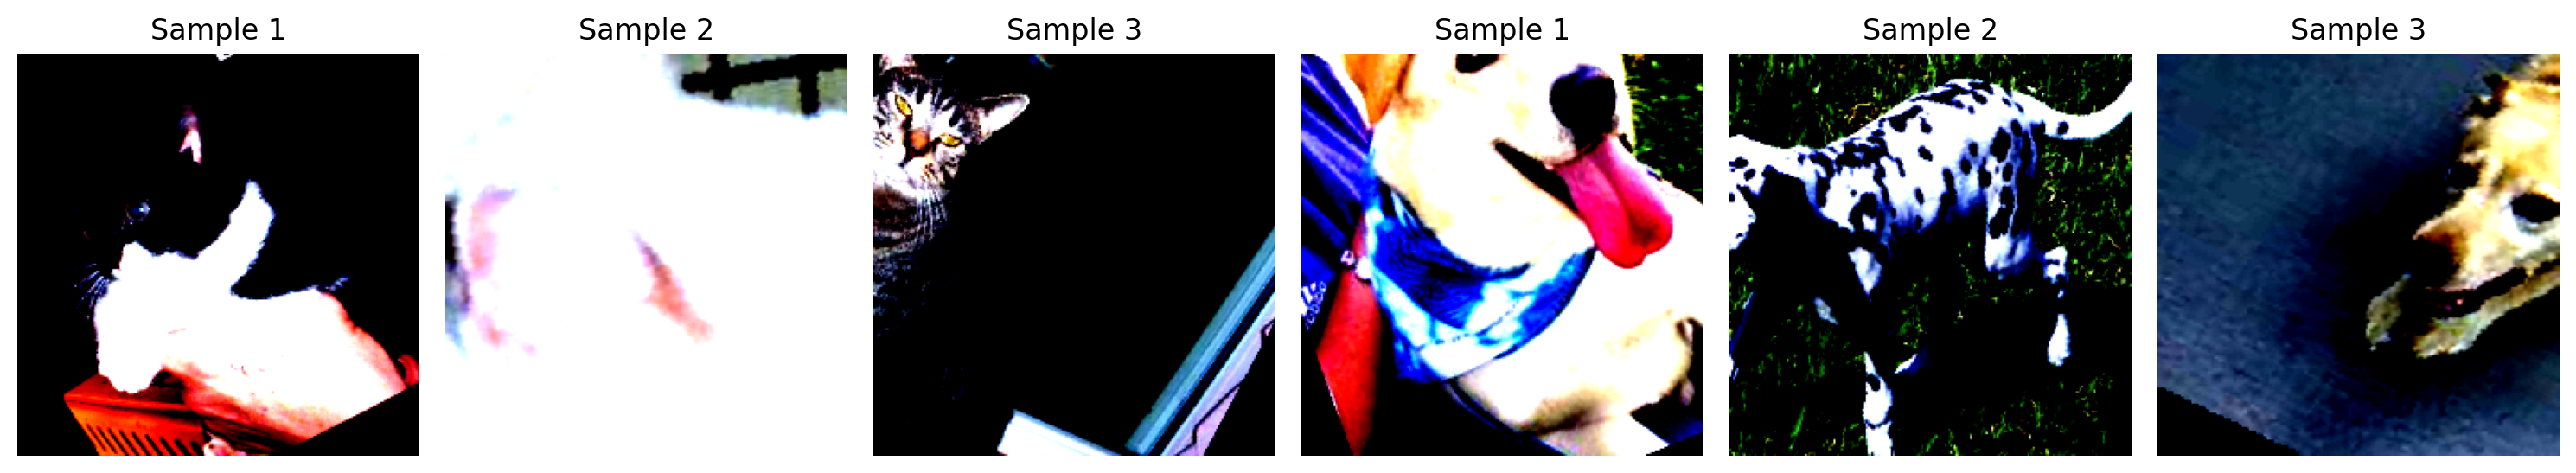

In [3]:
def show_dataset_info(dataset, class_names, num_samples=5):
    """
    Show some basic information about the dataset: size, class distribution, and sample images.
    
    Args:
        dataset (torch.utils.data.Dataset): The dataset object.
        class_names (list): List of class names.
        num_samples (int): Number of sample images to display from each class.
    """
    # 1. Dataset size (number of images in total)
    total_samples = len(dataset)
    print(f"Total number of samples in dataset: {total_samples}")
    
    # 2. Class distribution (how many samples per class)
    class_counts = Counter()
    
    # We need to iterate through the dataset to count class distribution
    for _, label in dataset:
        class_counts[label] += 1  # Count the occurrences of each class
    
    print("\nClass distribution:")
    for class_idx, count in class_counts.items():
        print(f"{class_names[class_idx]}: {count} samples")

    # 3. Visualize some sample images
    print("\nDisplaying sample images...")
    fig, axes = plt.subplots(1, num_samples * len(class_names), figsize=(15, 5))
    
    # Show sample images for each class
    for class_idx in range(len(class_names)):
        # Filter dataset for images with the current class
        class_samples = [img for img, label in dataset if label == class_idx]
        sample_images = class_samples[:num_samples]

        for i, img in enumerate(sample_images):
            ax = axes[class_idx * num_samples + i]
            ax.imshow(img.permute(1, 2, 0))  # Change from (C, H, W) to (H, W, C)
            ax.set_title(f"Sample {i + 1}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Use your dataset (train_loader.dataset or similar) here
show_dataset_info(train_loader.dataset, class_names, num_samples=3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0434113].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping i

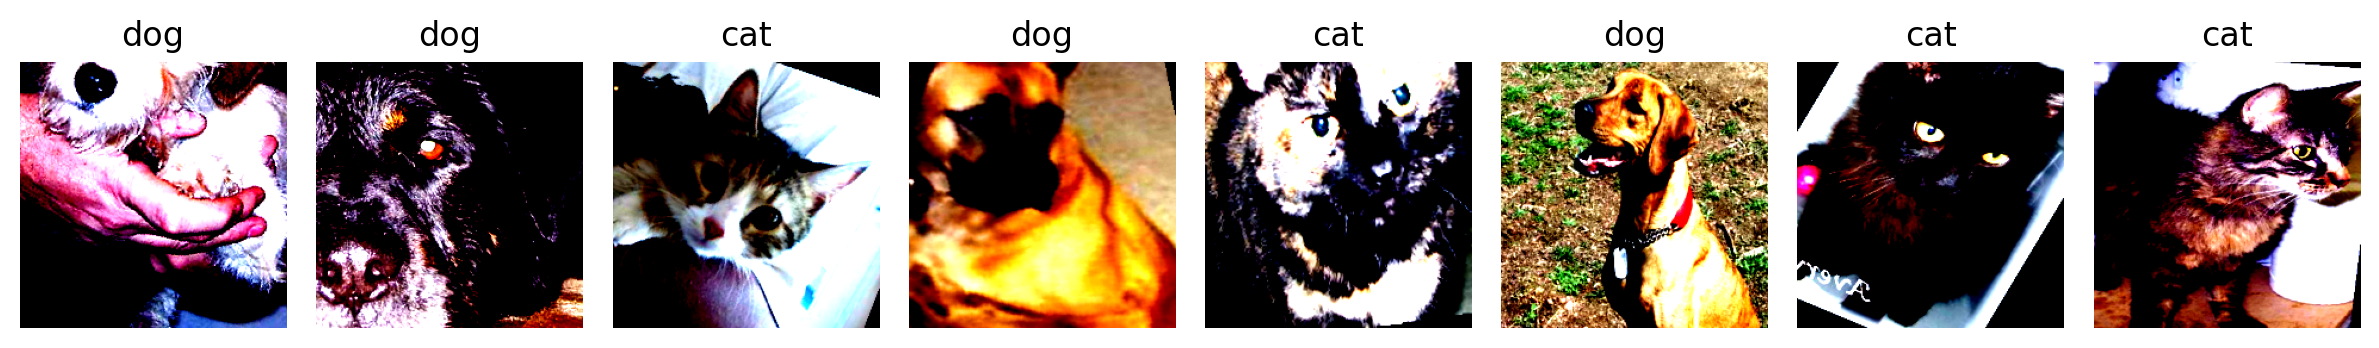

In [4]:
def visualize_training_samples(data_loader, classes, num_samples=6):
    """
    Visualize some samples from the training dataset with their labels.
    
    Args:
        data_loader (torch.utils.data.DataLoader): The DataLoader for the dataset.
        classes (list): List of class names.
        num_samples (int): Number of samples to visualize.
    """
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # Get a batch of images and labels

    images, labels = images[:num_samples], labels[:num_samples]  # Select a subset
    
    plt.figure(figsize=(12, 6))
    for idx in range(num_samples):
        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(images[idx].permute(1, 2, 0).cpu())  # Convert CHW to HWC
        plt.title(classes[labels[idx].item()])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
classes = ['cat', 'dog']  # Define your class names
visualize_training_samples(train_loader, classes, num_samples=8)

In [5]:
train_metrics = {'loss': [0.3444100065208764, 0.32261768921437967, 0.3340181319777709, 0.33404733596807457, 0.33166973043485465, 0.3200883221816257, 0.32575156676223077, 0.321648150059094, 0.32439673335784935, 0.32918479747743723, 0.3296717419567336, 0.32357384297121095, 0.3213427056116887, 0.3157612166081767, 0.32007191377688216], 'accuracy': [0.8378513429106809, 0.8550905683947533, 0.8452217364147407, 0.846470955652717, 0.852841973766396, 0.8544659587757651, 0.8503435352904435, 0.8509681449094316, 0.8488444722048719, 0.8545908806995628, 0.8513429106808245, 0.8504684572142411, 0.8505933791380387, 0.8524672079950031, 0.8597126795752654], 'precision': [0.8378948103464261, 0.8551154248463784, 0.8452535744930509, 0.8464884505633269, 0.8528916251557558, 0.854513775999135, 0.85043164085601, 0.8509705399900218, 0.848889470805634, 0.8546977851919556, 0.8513571339368019, 0.8504708476628439, 0.8506098848806786, 0.8524997781614542, 0.8597746043695094], 'recall': [0.8378513429106809, 0.8550905683947533, 0.8452217364147407, 0.846470955652717, 0.852841973766396, 0.8544659587757651, 0.8503435352904435, 0.8509681449094316, 0.8488444722048719, 0.8545908806995628, 0.8513429106808245, 0.8504684572142411, 0.8505933791380387, 0.8524672079950031, 0.8597126795752654], 'f1': [0.837845406330747, 0.8550875697307035, 0.8452175914799517, 0.8464685932571241, 0.8528361312838085, 0.8544604079008034, 0.8503332211238386, 0.850967735582012, 0.8488389381049336, 0.854578966458051, 0.8513410408405598, 0.850468046514391, 0.8505912247371342, 0.8524632570926739, 0.859705949461426]}
test_metrics = {'loss': [0.23184006405062973, 0.2256013962905854, 0.22356274398043752, 0.22653704095864668, 0.2235683703329414, 0.2214433770859614, 0.2485441798926331, 0.23092965956311673, 0.2582498793490231, 0.23538135667331517, 0.2226192342932336, 0.23764698466402479, 0.23685142147587612, 0.21251641551498324, 0.22425764665240422], 'accuracy': [0.9016312407315867, 0.9134948096885813, 0.907563025210084, 0.9036085022244191, 0.9090459713297083, 0.9100346020761245, 0.8996539792387543, 0.9065743944636678, 0.8907563025210085, 0.9045971329708354, 0.9100346020761245, 0.9065743944636678, 0.89817103311913, 0.912011863568957, 0.9115175481957489], 'precision': [0.9029080236254312, 0.914047280750728, 0.9076297707117452, 0.9073503926354657, 0.9120208081147442, 0.911680008267237, 0.9073404948379032, 0.9085843990937289, 0.8928059900380463, 0.906271899316965, 0.9134511962629255, 0.9132914391719466, 0.898796647595964, 0.9126554899693416, 0.9120673341443511], 'recall': [0.9016312407315867, 0.9134948096885813, 0.907563025210084, 0.9036085022244191, 0.9090459713297083, 0.9100346020761245, 0.8996539792387543, 0.9065743944636678, 0.8907563025210085, 0.9045971329708354, 0.9100346020761245, 0.9065743944636678, 0.89817103311913, 0.912011863568957, 0.9115175481957489], 'f1': [0.9015517117524086, 0.9134650800942126, 0.907558914222681, 0.9033840803754126, 0.9088793802143702, 0.90994305896794, 0.8991745371556702, 0.9064575480277781, 0.8906158238303304, 0.904497020206636, 0.9098461185886967, 0.9061899759101527, 0.8981322032785788, 0.9119765895759495, 0.9114871390677945]}

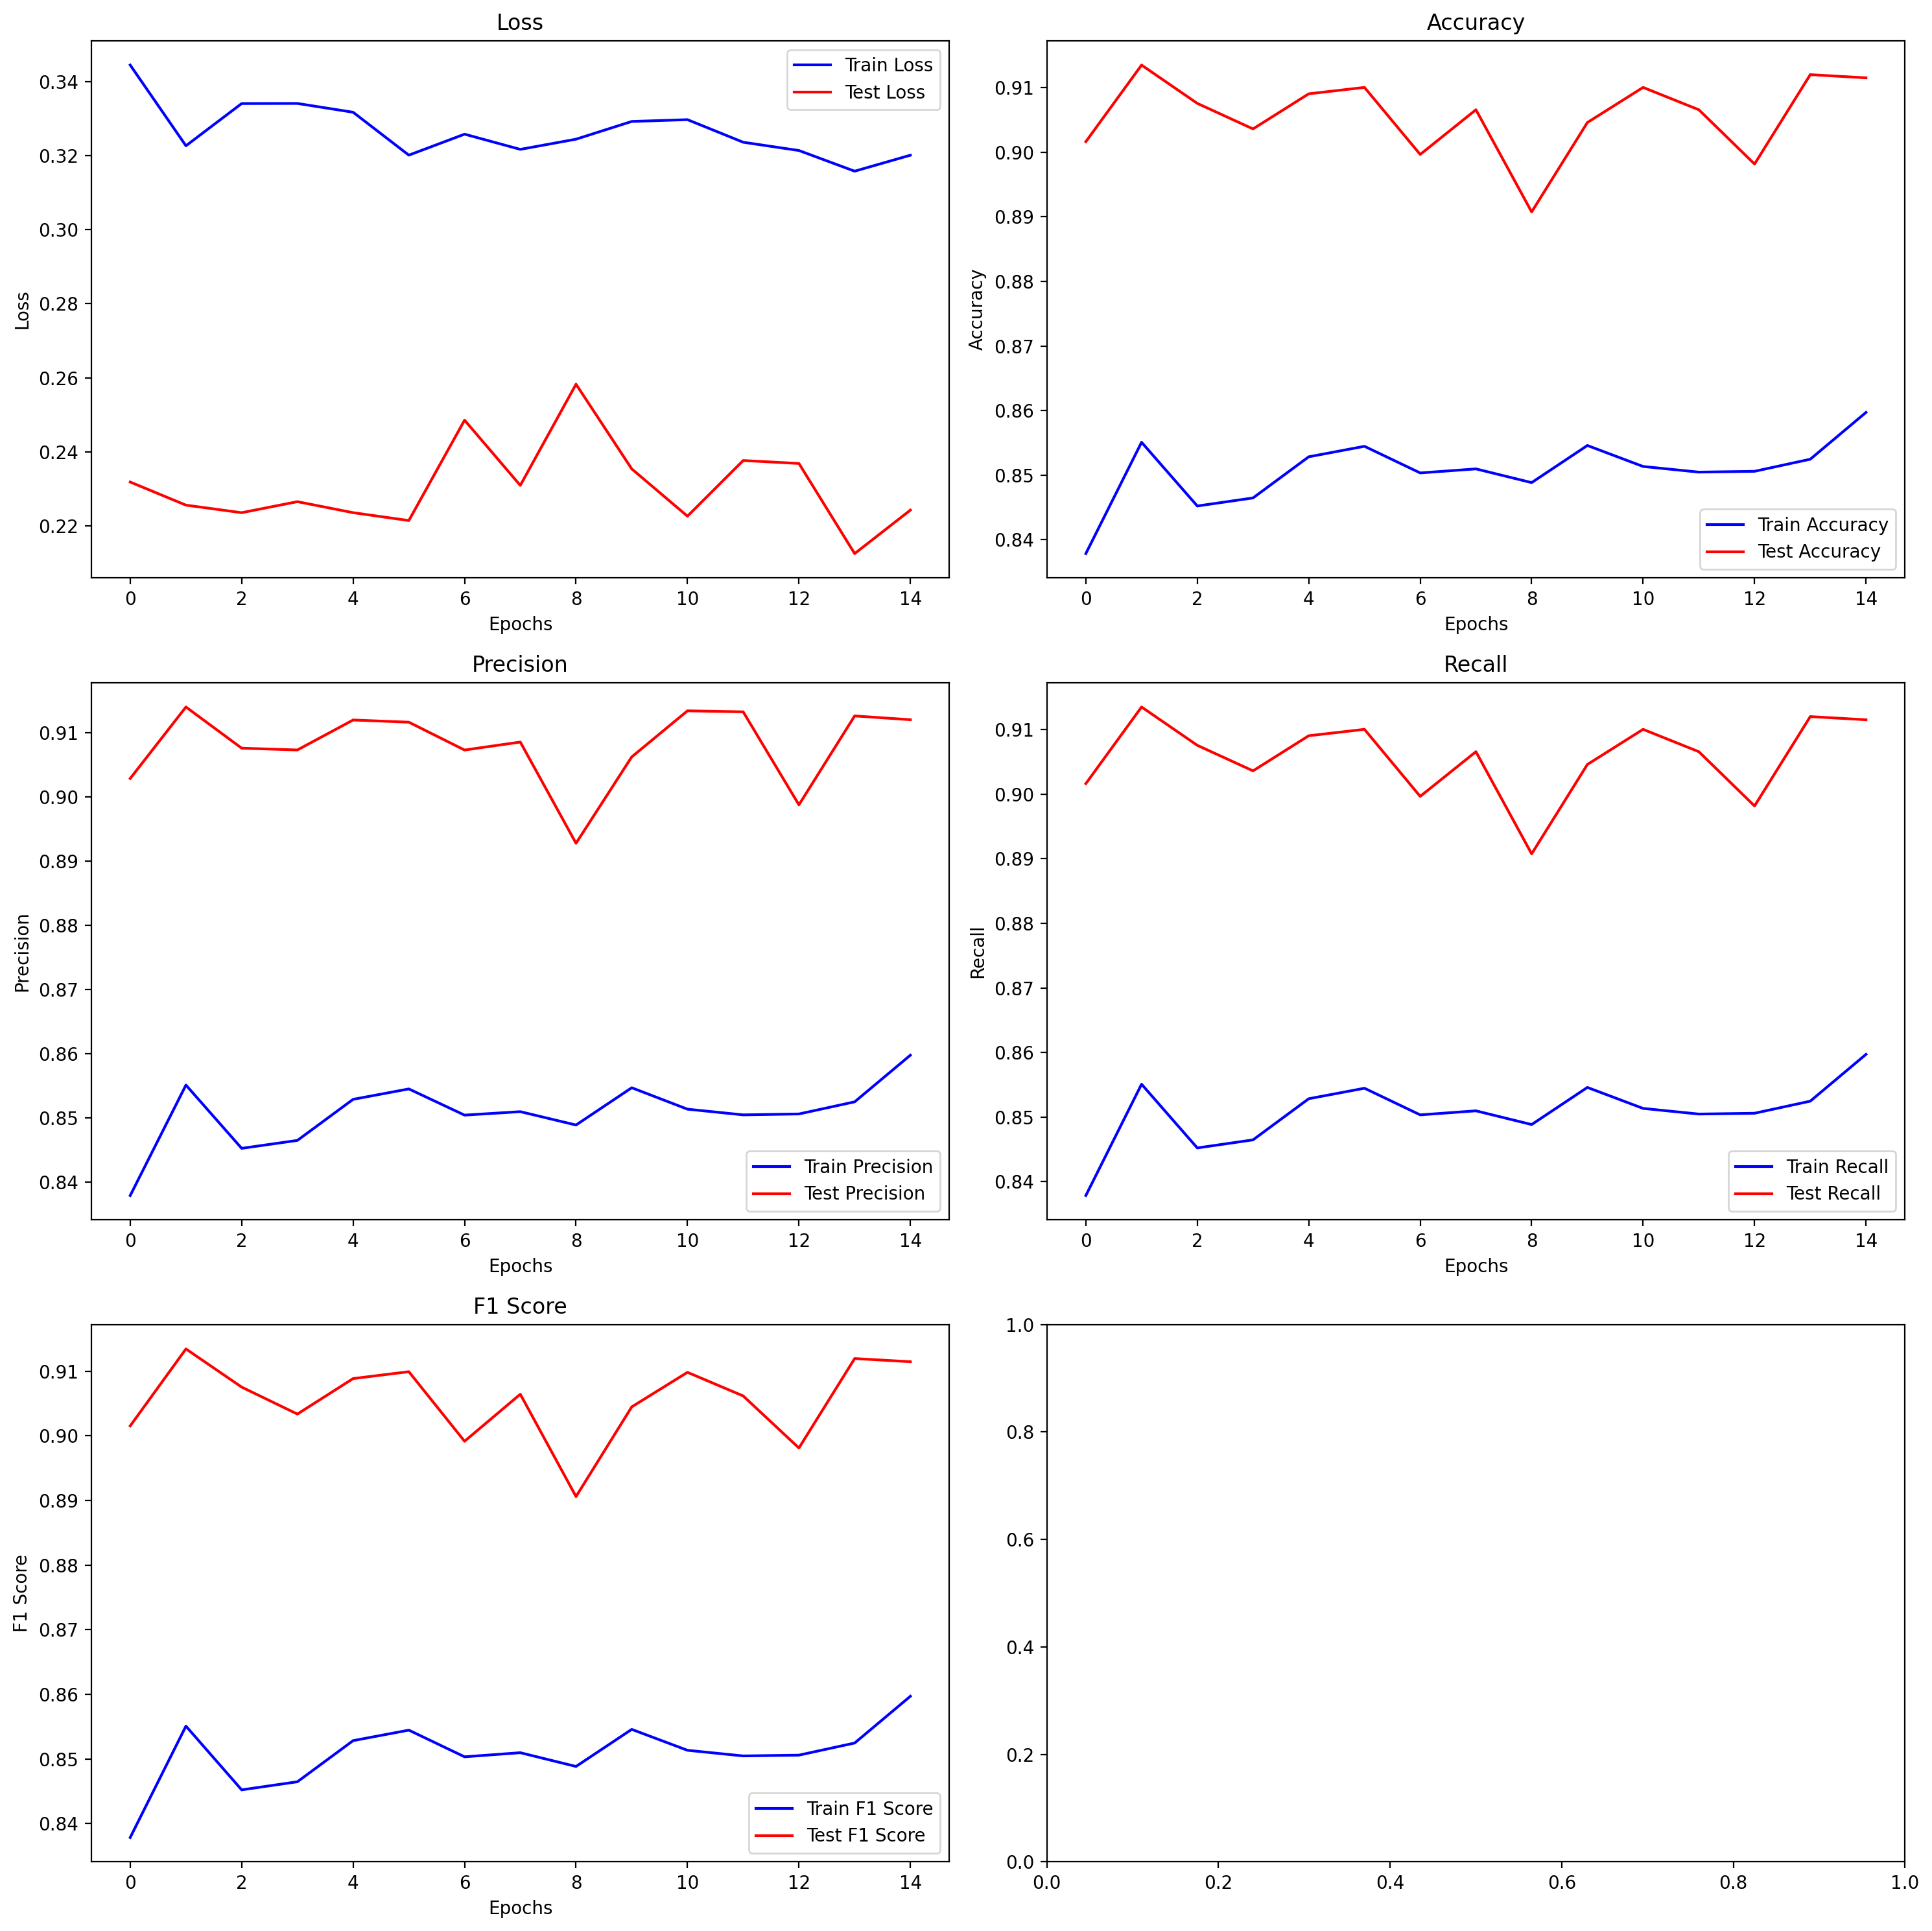

In [11]:
# Function to plot metrics
def plot_training_vs_test_metrics(train_metrics, test_metrics):
    epochs = len(train_metrics['loss'])
    
    # Plot all metrics
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    axes = axes.ravel()

    # Loss
    axes[0].plot(range(epochs), train_metrics['loss'], label='Train Loss', color='blue')
    axes[0].plot(range(epochs), test_metrics['loss'], label='Test Loss', color='red')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Accuracy
    axes[1].plot(range(epochs), train_metrics['accuracy'], label='Train Accuracy', color='blue')
    axes[1].plot(range(epochs), test_metrics['accuracy'], label='Test Accuracy', color='red')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    # Precision
    axes[2].plot(range(epochs), train_metrics['precision'], label='Train Precision', color='blue')
    axes[2].plot(range(epochs), test_metrics['precision'], label='Test Precision', color='red')
    axes[2].set_title('Precision')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Precision')
    axes[2].legend()

    # Recall
    axes[3].plot(range(epochs), train_metrics['recall'], label='Train Recall', color='blue')
    axes[3].plot(range(epochs), test_metrics['recall'], label='Test Recall', color='red')
    axes[3].set_title('Recall')
    axes[3].set_xlabel('Epochs')
    axes[3].set_ylabel('Recall')
    axes[3].legend()

    # F1 Score
    axes[4].plot(range(epochs), train_metrics['f1'], label='Train F1 Score', color='blue')
    axes[4].plot(range(epochs), test_metrics['f1'], label='Test F1 Score', color='red')
    axes[4].set_title('F1 Score')
    axes[4].set_xlabel('Epochs')
    axes[4].set_ylabel('F1 Score')
    axes[4].legend()

    plt.tight_layout()
    plt.show()

plot_training_vs_test_metrics(train_metrics, test_metrics)

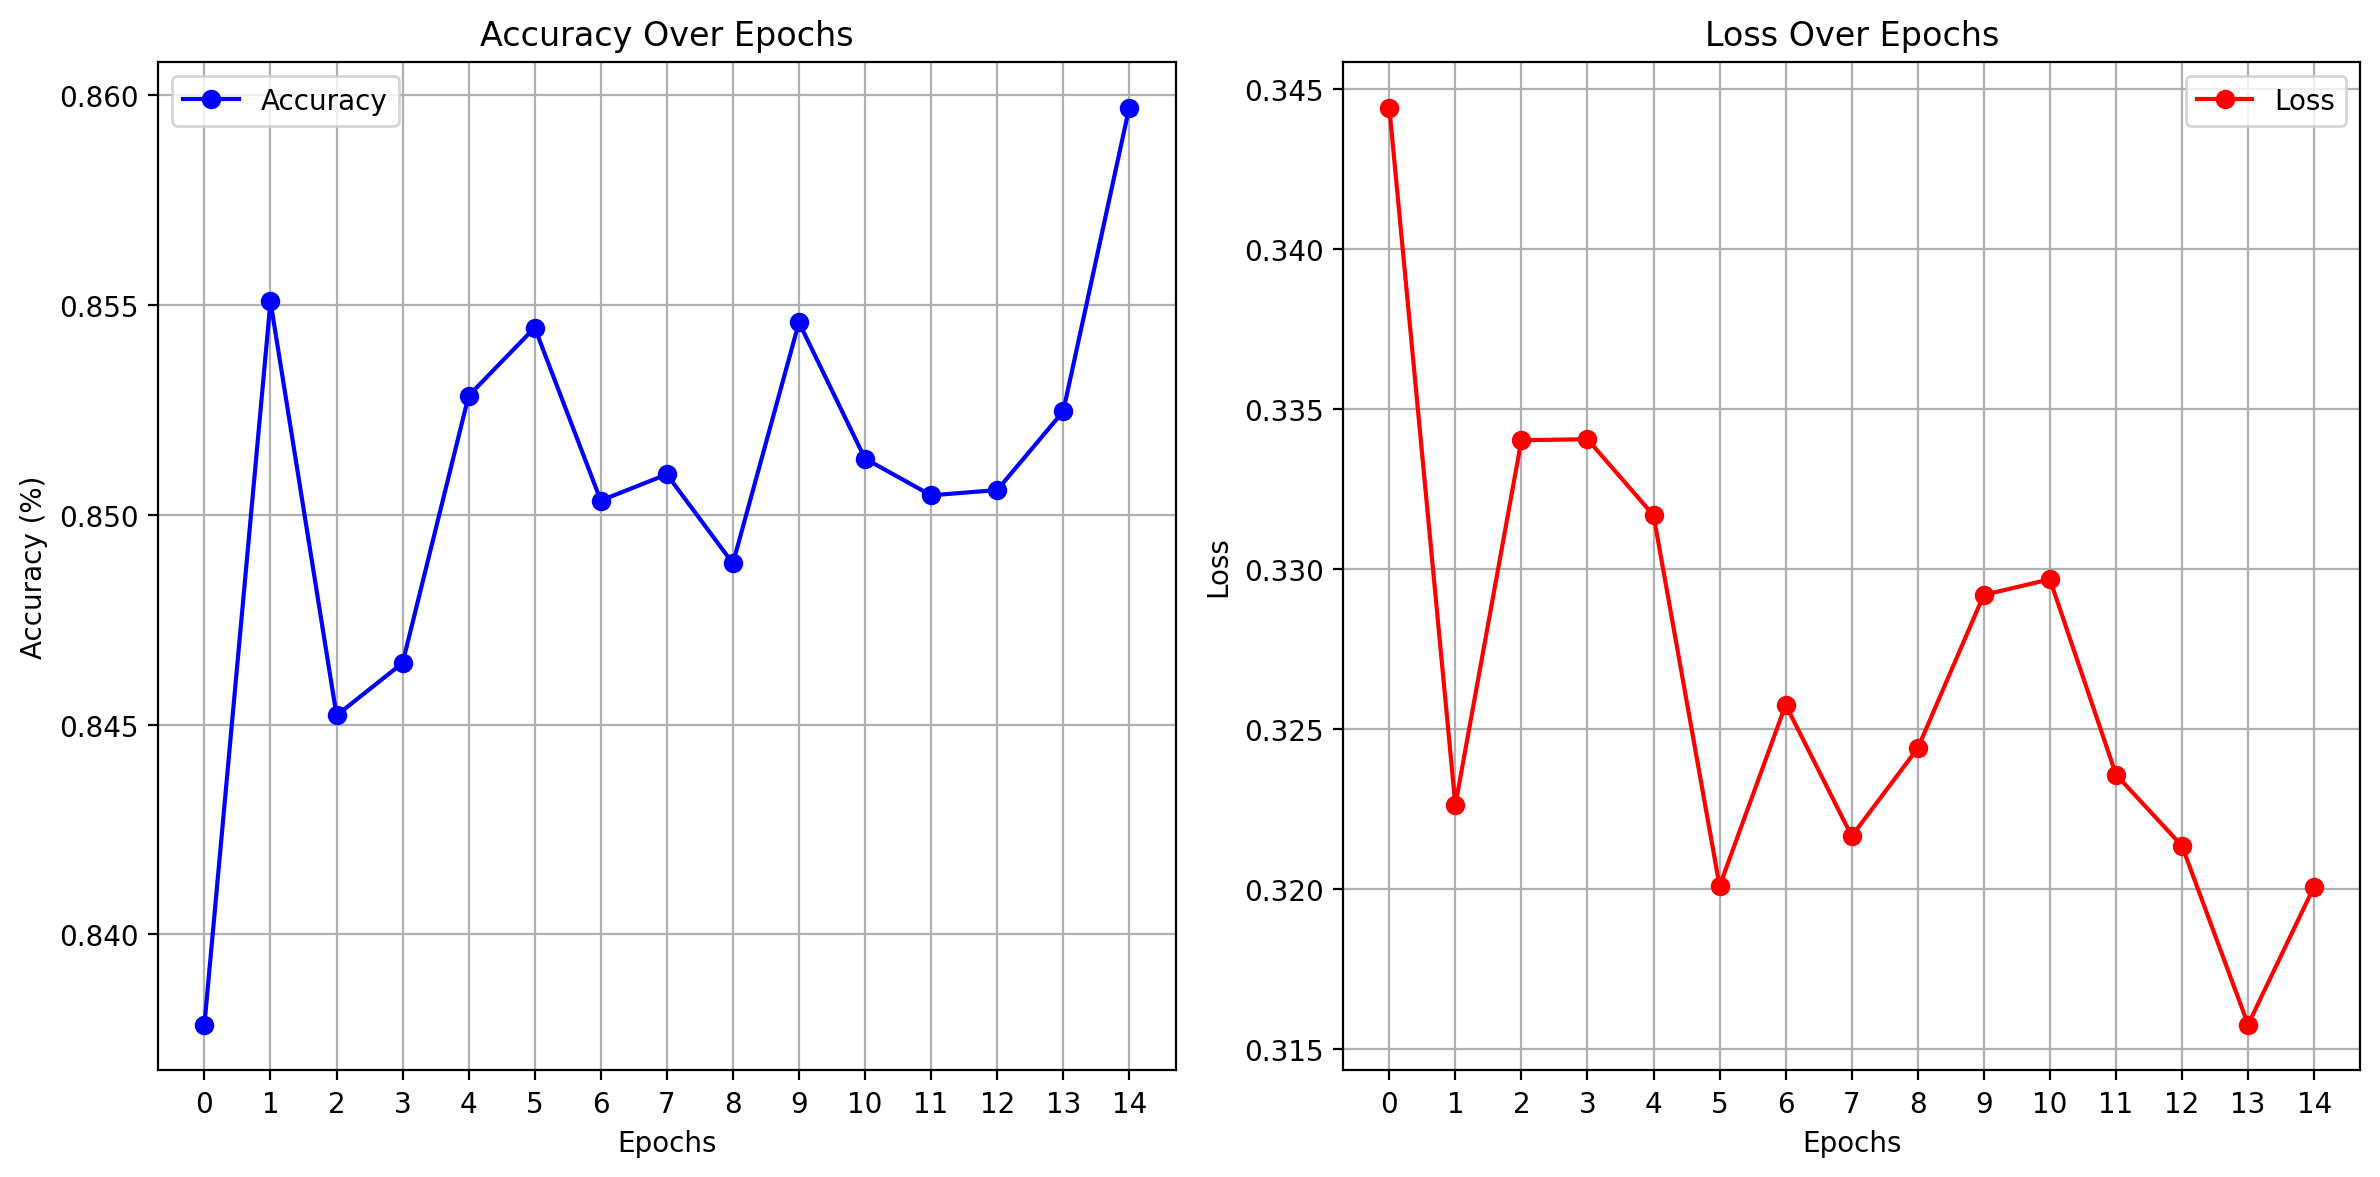

In [6]:

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Accuracy
ax1.plot(train_metrics["accuracy"], label='Accuracy', marker='o', color='blue')
ax1.set_title('Accuracy Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(range(len(train_metrics["accuracy"])))
ax1.legend()
ax1.grid(True)

# Plot Loss
ax2.plot(train_metrics["loss"], label='Loss', marker='o', color='red')
ax2.set_title('Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_xticks(range(len(train_metrics["loss"])))
ax2.legend()
ax2.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show both plots
plt.show()

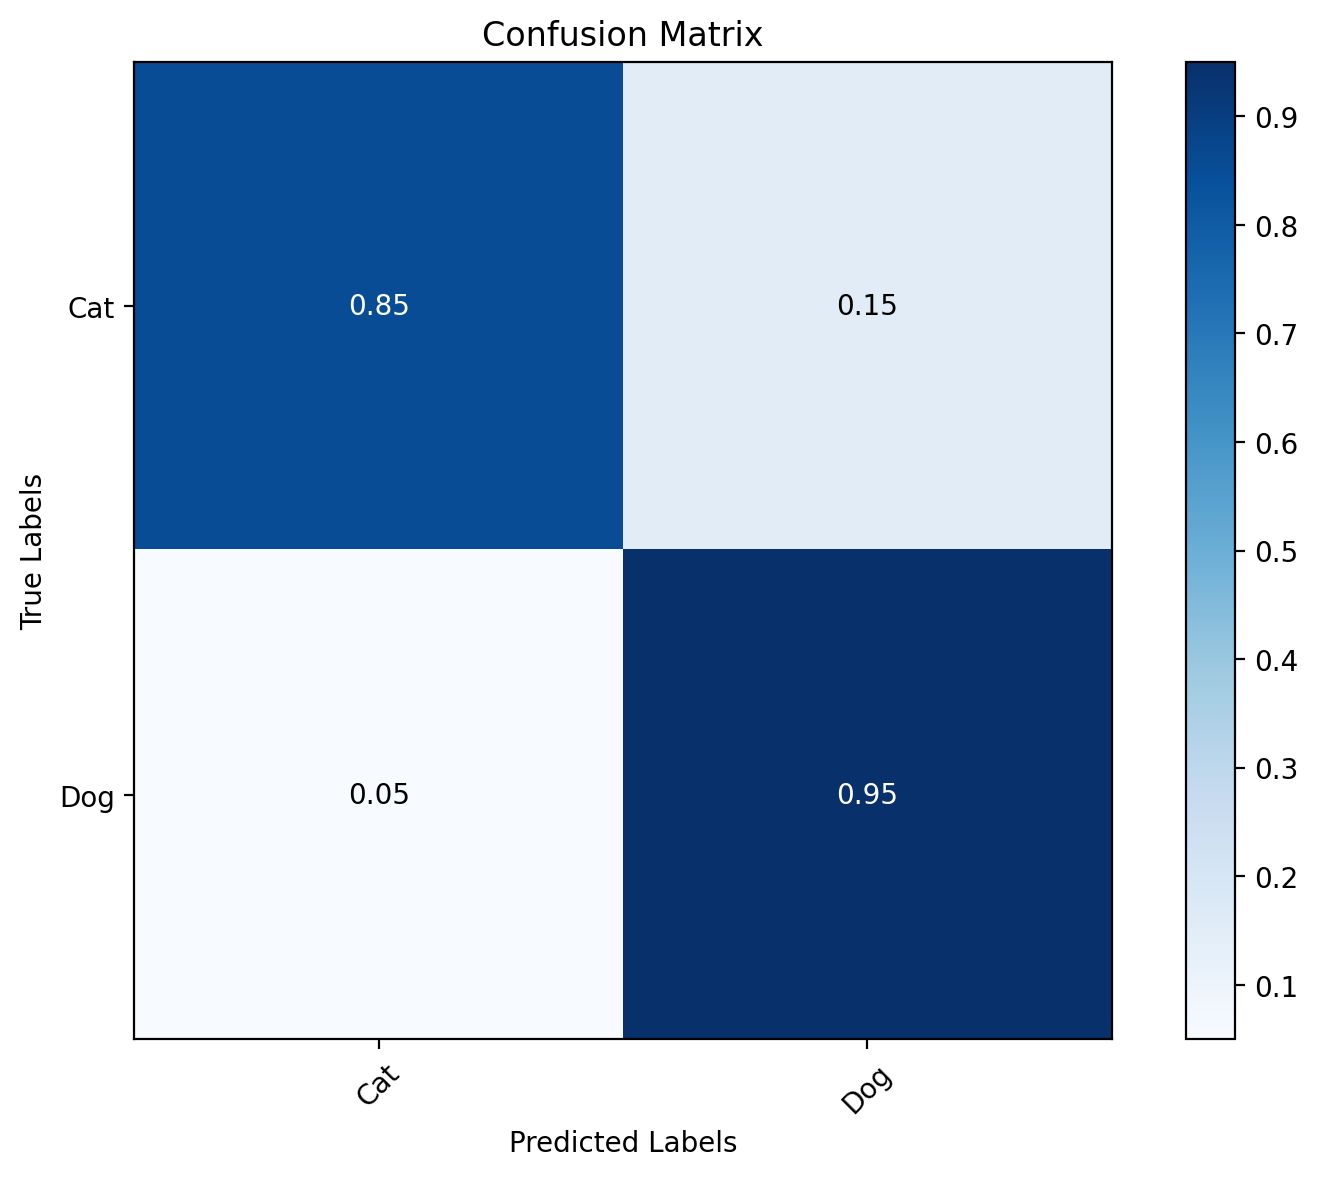

Accuracy: 90.00%


In [7]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix using matplotlib (without seaborn).

    Args:
        y_true (list or numpy array): Ground truth labels.
        y_pred (list or numpy array): Predicted labels.
        classes (list): List of class names.
        title (str): Title for the plot.
        cmap: Colormap for the heatmap.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix by row (i.e., by the number of true instances for each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create the confusion matrix plot
    plt.figure(figsize=(8, 6))
    cax = plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(cax)

    # Labels, title, and ticks
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Plot the text annotations inside the cells
    thresh = cm_normalized.max() / 2
    for i in range(cm_normalized.shape[0]):
        for j in range(cm_normalized.shape[1]):
            plt.text(j, i, f'{cm_normalized[i, j]:.2f}',
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm_normalized[i, j] > thresh else "black")

    # Axis labels
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have true labels and predicted labels
# y_true = [true labels for the test set]
# y_pred = [predicted labels from the model]
# classes = ['class1', 'class2', 'class3', ...]


# Compute predictions and true labels
all_preds = []
all_labels = []
classes = ["Cat","Dog"]
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device),labels.to(device)
        outputs = model_cnn(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=[0, 1])  # Adjust labels as per your classes
display_labels = test_dataset.classes  # Class names from the dataset


plot_confusion_matrix(all_labels, all_preds, classes)

# Calculate and print accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.4110641].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8256302..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.5768193].


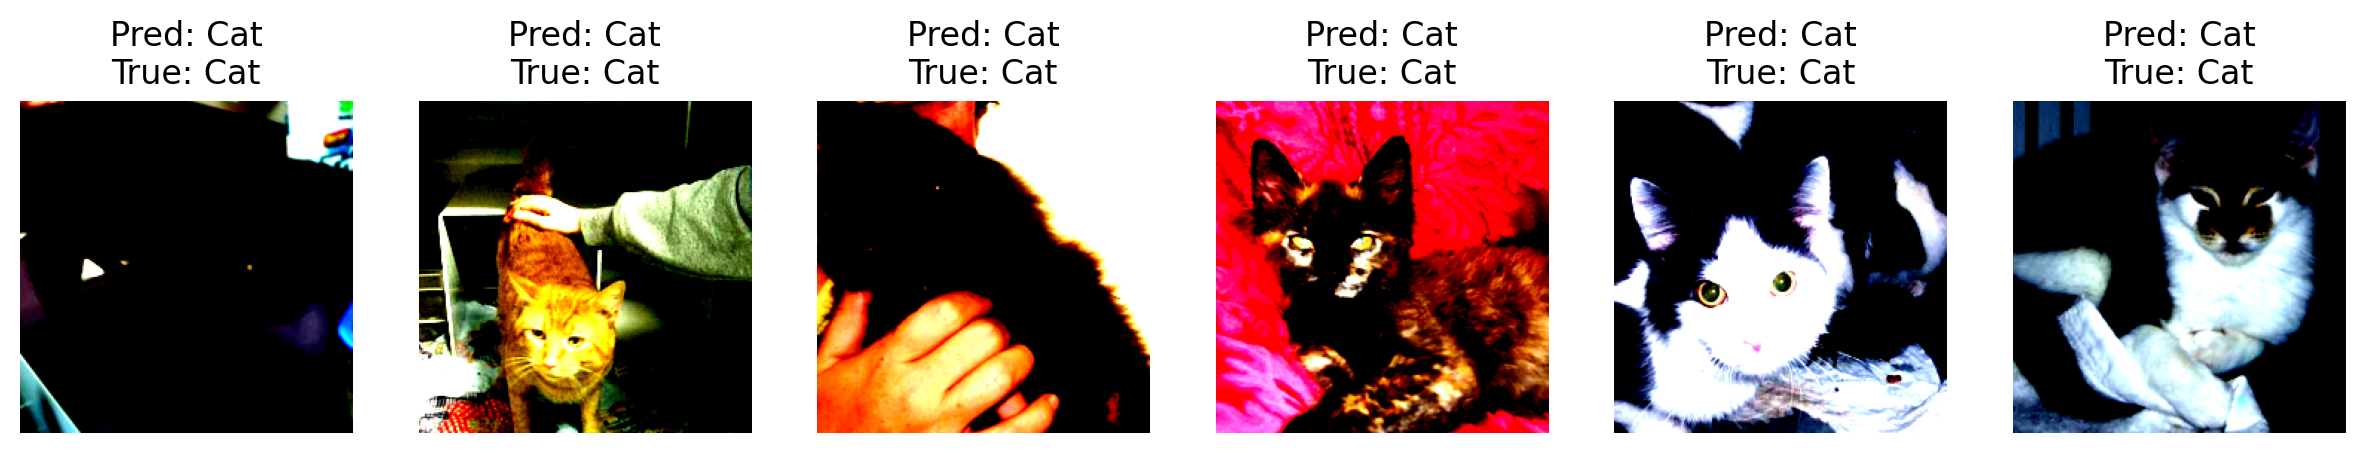

In [8]:
class_names = ["Cat", "Dog"]

def show_predictions(model, dataset, class_names, device, max_images=6):
    model.eval()
    # Iterate through the dataset
    for images, labels in dataset:
        images, labels = images.to(device), labels.to(device)

        # Get predictions
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Limit the number of images to display
        num_images = min(max_images, len(images))

        # Plot images with predicted labels
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        
        # Loop through images and plot them
        for i in range(num_images):
            # Convert the tensor image to numpy for displaying with matplotlib
            img = images[i].cpu().permute(1, 2, 0).numpy()  # Change from (C, H, W) to (H, W, C)
            axes[i].imshow(img)
            axes[i].set_title(f"Pred: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}")
            axes[i].axis('off')

        plt.show()
        break  # Show only one batch of images (remove `break` to show more)

# Example usage:
show_predictions(model_cnn, test_loader, class_names, device, max_images=6)
